In [46]:
from expetator.tools import read_experiment, show_heatmap, add_objectives
from expetator.tools import prune_vectors, mojitos_to_vectors, show_pct_distribution
from expetator.monitors import mojitos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [136]:
basename = ['../../'+ path for path in 
            ['datasets/large/0_allpct_grisou-15.nancy.grid5000.fr_1589459642.zip',
           'datasets/large/0_allpct_grisou-1.nancy.grid5000.fr_1589456512.zip',
           ]]

In [137]:
basename

['../../datasets/large/0_allpct_grisou-15.nancy.grid5000.fr_1589459642.zip',
 '../../datasets/large/0_allpct_grisou-1.nancy.grid5000.fr_1589456512.zip']

### 1. Read dataset
#### 1.1 knowledge
- **duration = endTime - startTime**: but knowledge.duration < duration
- **nproc**: number of processing units
- **energy**: duration * power
- **etp**: duration*energy
- **expe**: the index of experiment

#### 1.2 mojitos
```
network_names = {'rxb', 'rxp', 'txb', 'txp'}
infiniband_names = {'irxb', 'irxp', 'itxb', 'itxp'}
rapl_names = {'dram0', 'dram1', 'package-00', 'package-11'}
load_names = {'user', 'nice', 'system', 'idle', 'iowait', 'irq',
              'softirq', 'steal', 'guest', 'guest_nice'}
perf_names = {'cpu_cycles', 'instructions', 'cache_references', 'cache_misses',
              'branch_instructions', 'branch_misses', 'bus_cycles', 'ref_cpu_cycles',
              'cache_l1d', 'cache_ll', 'cache_dtlb', 'cache_itlb', 'cache_bpu',
              'cache_node', 'cache_op_read', 'cache_op_prefetch', 'cache_result_access',
              'cpu_clock', 'task_clock', 'page_faults', 'context_switches',
              'cpu_migrations', 'page_faults_min', 'page_faults_maj',
              'alignment_faults', 'emulation_faults', 'dummy', 'bpf_output'}
```

In [146]:
knowledge, mojitos_data = read_experiment(basename, only_complete=True)
vectors = mojitos_to_vectors(mojitos_data, knowledge)

In [147]:
# Computes the best operating frequency for each experiment 
"""
tren tung expe lay ra list cac frequencies co muc energy tieu thu thap nhat chenh lac ko qua ratio.
target = fmax if fmax in frequencies else best frequency
targetz = 0 if fmax in frequencies else best frequency
"""

metric = 'energy'
# 'energy' : energy in joules
# 'duration' : duration in second
# 'etp' : energy time product 

_ = add_objectives(knowledge, objective_name='target', group_label='expe', metric=metric, ratio=1.05, stay_is_zero=False)
_ = add_objectives(knowledge, objective_name='targetZ', group_label='expe', metric=metric, ratio=1.05, stay_is_zero=True)

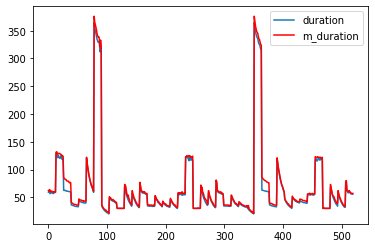

In [6]:
# duration = endTime - startTime: but knowledge.duration < duration
df_knowledge = knowledge
ax = plt.gca()
df_knowledge['m_duration'] = knowledge.endTime - knowledge.startTime
df_knowledge.plot(kind='line',y='duration',ax=ax)
df_knowledge.plot(kind='line',y='m_duration', color='red', ax=ax)
plt.show()

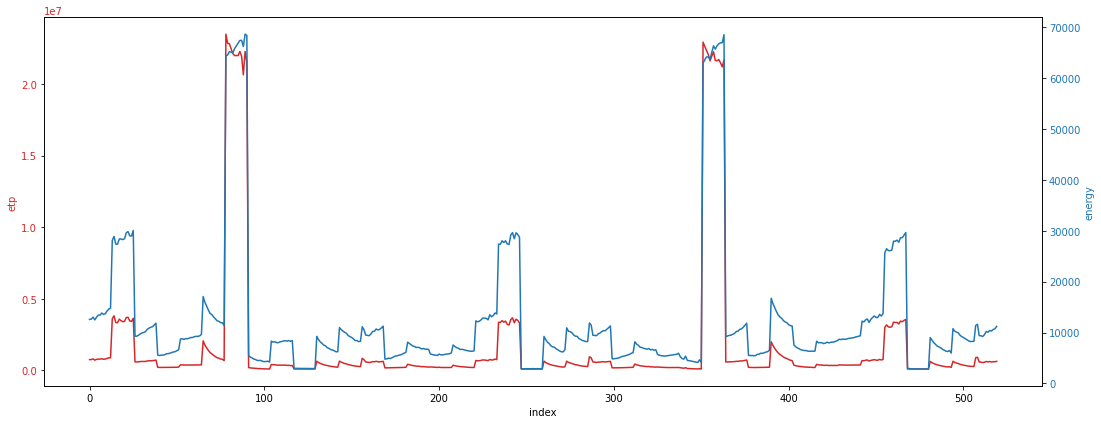

In [7]:
"""
The comperation between energy and etp metric
"""
fig, ax1 = plt.subplots(figsize=[15.4, 6])
color = 'tab:red'
ax1.set_xlabel('index')
ax1.set_ylabel('etp', color=color)
ax1.plot(range(len(knowledge)), knowledge.etp, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('energy', color=color)
ax2.plot(range(len(knowledge)), knowledge.energy, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [8]:
nameofprograms = list(set(df_knowledge.fullname))

In [9]:
nameofprograms

['lu-C-64',
 'mg-D-64',
 'bt-C-64',
 'mem-16',
 'cg-D-64',
 'mpigeneric-0-0-8-8',
 'is-D-64',
 'mem-32',
 'mpigeneric-0-0-16-0',
 'mpigeneric-4-4-4-4',
 'mpigeneric-16-0-0-0',
 'mpigeneric-0-16-0-0',
 'mpigeneric-0-0-0-16',
 'sp-C-64',
 'sleep-30',
 'ep-D-64',
 'ft-C-64']

<AxesSubplot:xlabel='expewithname', ylabel='energy'>

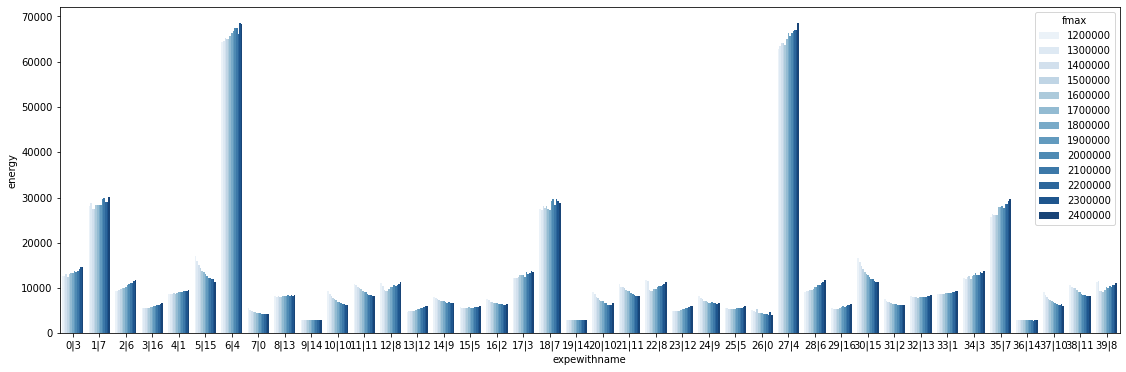

In [10]:
df_knowledge['expewithname'] = df_knowledge.apply(lambda row: str(row['expe'])+"|"+str(nameofprograms.index(row['fullname'])),axis=1)
fig, ax = plt.subplots(figsize=[19, 6])
sns.barplot(x = 'expewithname',
            y = 'energy',
            hue = 'fmax',
            data = df_knowledge[['expewithname','fmax','energy']],
            palette = "Blues")

In [11]:
knowledge[['expe','fullname']].drop_duplicates()

expe             fullname
0       0               mem-16
13      1               mem-32
26      2              is-D-64
39      3              ft-C-64
52      4              mg-D-64
65      5              ep-D-64
78      6              cg-D-64
91      7              lu-C-64
104     8              sp-C-64
117     9             sleep-30
130    10  mpigeneric-16-0-0-0
143    11  mpigeneric-0-16-0-0
156    12  mpigeneric-0-0-16-0
169    13  mpigeneric-0-0-0-16
182    14   mpigeneric-4-4-4-4
195    15   mpigeneric-0-0-8-8
208    16              bt-C-64
221    17               mem-16
234    18               mem-32
247    19             sleep-30
260    20  mpigeneric-16-0-0-0
273    21  mpigeneric-0-16-0-0
286    22  mpigeneric-0-0-16-0
299    23  mpigeneric-0-0-0-16
312    24   mpigeneric-4-4-4-4
325    25   mpigeneric-0-0-8-8
338    26              lu-C-64
351    27              cg-D-64
364    28              is-D-64
377    29              ft-C-64
390    30              ep-D-64
403    31              bt-C-64
416    32              sp-C-64
429    33              mg-D-64
442    34               mem-16
455    35               mem-32
468    36             sleep-30
481    37  mpigeneric-16-0-0-0
494    38  mpigeneric-0-16-0-0
507    39  mpigeneric-0-0-16-0

In [22]:
k2 = knowledge[knowledge.fmax.isin(set(knowledge.targetZ) - {0})]

In [23]:
# Lighter color is better
show_heatmap(k2, metric='targetZ', y='fullname')#mean

In [24]:
show_heatmap(k2, metric='targetZ', y='expe')

In [12]:
knowledge

hostname             fullname  nproc   duration  \
0    grisou-15.nancy.grid5000.fr               mem-16     64  59.237493   
1    grisou-15.nancy.grid5000.fr               mem-16     64  58.788879   
2    grisou-15.nancy.grid5000.fr               mem-16     64  61.097058   
3    grisou-15.nancy.grid5000.fr               mem-16     64  56.435018   
4    grisou-15.nancy.grid5000.fr               mem-16     64  58.267301   
..                           ...                  ...    ...        ...   
515   grisou-1.nancy.grid5000.fr  mpigeneric-0-0-16-0     64  58.353963   
516   grisou-1.nancy.grid5000.fr  mpigeneric-0-0-16-0     64  56.096418   
517   grisou-1.nancy.grid5000.fr  mpigeneric-0-0-16-0     64  56.196199   
518   grisou-1.nancy.grid5000.fr  mpigeneric-0-0-16-0     64  55.274901   
519   grisou-1.nancy.grid5000.fr  mpigeneric-0-0-16-0     64  55.621336   

      startTime     endTime     fmin     fmax  \
0    1589459701  1589459763  1200000  1200000   
1    1589459783  1589459844  1200000  1300000   
2    1589459857  1589459921  1200000  1400000   
3    1589459933  1589459994  1200000  1500000   
4    1589460006  1589460067  1200000  1600000   
..          ...         ...      ...      ...   
515  1589477505  1589477564  1200000  2000000   
516  1589477577  1589477634  1200000  2100000   
517  1589477647  1589477704  1200000  2200000   
518  1589477717  1589477774  1200000  2300000   
519  1589477786  1589477843  1200000  2400000   

                                              hostlist  \
0    grisou-15.nancy.grid5000.fr;grisou-16.nancy.gr...   
1    grisou-15.nancy.grid5000.fr;grisou-16.nancy.gr...   
2    grisou-15.nancy.grid5000.fr;grisou-16.nancy.gr...   
3    grisou-15.nancy.grid5000.fr;grisou-16.nancy.gr...   
4    grisou-15.nancy.grid5000.fr;grisou-16.nancy.gr...   
..                                                 ...   
515  grisou-1.nancy.grid5000.fr;grisou-2.nancy.grid...   
516  grisou-1.nancy.grid5000.fr;grisou-2.nancy.grid...   
517  grisou-1.nancy.grid5000.fr;grisou-2.nancy.grid...   
518  grisou-1.nancy.grid5000.fr;grisou-2.nancy.grid...   
519  grisou-1.nancy.grid5000.fr;grisou-2.nancy.grid...   

                                            basename  expe       power  \
0    0_allpct_grisou-15.nancy.grid5000.fr_1589459642     0  212.260000   
1    0_allpct_grisou-15.nancy.grid5000.fr_1589459642     0  215.122449   
2    0_allpct_grisou-15.nancy.grid5000.fr_1589459642     0  213.245283   
3    0_allpct_grisou-15.nancy.grid5000.fr_1589459642     0  221.056604   
4    0_allpct_grisou-15.nancy.grid5000.fr_1589459642     0  223.500000   
..                                               ...   ...         ...   
515   0_allpct_grisou-1.nancy.grid5000.fr_1589456512    39  178.425532   
516   0_allpct_grisou-1.nancy.grid5000.fr_1589456512    39  183.543478   
517   0_allpct_grisou-1.nancy.grid5000.fr_1589456512    39  188.531915   
518   0_allpct_grisou-1.nancy.grid5000.fr_1589456512    39  194.458333   
519   0_allpct_grisou-1.nancy.grid5000.fr_1589456512    39  201.375000   

           energy            etp   target  targetZ  m_duration expewithname  
0    12573.750264  744837.443258  1200000        0          62          0|3  
1    12646.807623  743491.643099  1300000        0          61          0|3  
2    13028.659425  796012.760541  1400000        0          64          0|3  
3    12475.333413  704045.665718  1500000        0          61          0|3  
4    13022.741773  758800.014762  1600000        0          61          0|3  
..            ...            ...      ...      ...         ...          ...  
515  10411.836888  607571.944502  1600000  1600000          59         39|8  
516  10296.131678  577576.106375  1600000  1600000          57         39|8  
517  10594.777007  595386.197058  1600000  1600000          57         39|8  
518  10748.665124  594131.400591  1600000  1600000          57         39|8  
519  11200.746537  623000.486585  1600000  1600000          57         39|8  

[520 rows x

/Users/nguyenthang/anaconda3/envs/ups/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


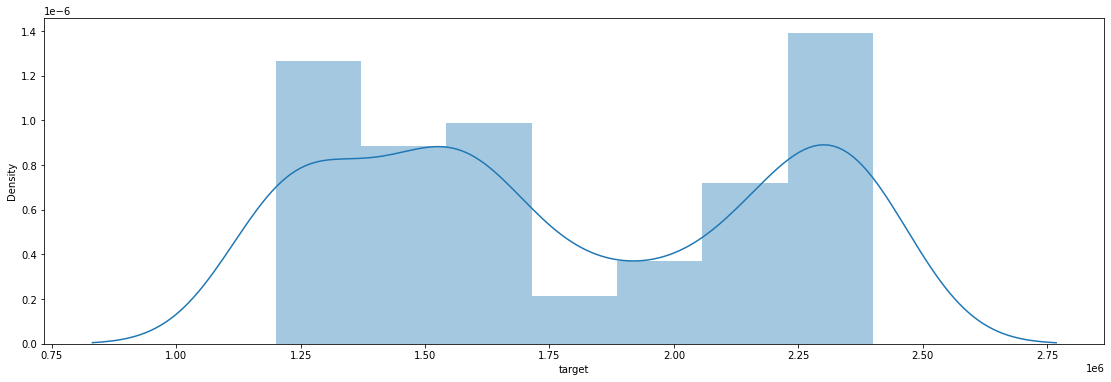

In [30]:
fig, ax = plt.subplots(figsize=[19, 6])
sns.distplot(knowledge.target);

In [27]:
set(knowledge.target)

{1200000,
 1300000,
 1400000,
 1500000,
 1600000,
 1700000,
 1800000,
 1900000,
 2000000,
 2100000,
 2200000,
 2300000,
 2400000}

In [29]:
knowledge.target.value_counts()

1200000    71
1600000    69
2400000    63
2300000    61
1500000    48
1300000    42
2200000    41
1400000    31
2100000    23
1800000    19
1700000    19
1900000    18
2000000    15
Name: target, dtype: int64

### Statistical description of numerical variables

In [15]:
knowledge.describe()

nproc    duration     startTime       endTime       fmin          fmax  \
count  520.0  520.000000  5.200000e+02  5.200000e+02      520.0  5.200000e+02   
mean    64.0   65.288884  1.589469e+09  1.589469e+09  1200000.0  1.800000e+06   
std      0.0   66.802577  6.719878e+03  6.715828e+03        0.0  3.745260e+05   
min     64.0   20.020000  1.589457e+09  1.589457e+09  1200000.0  1.200000e+06   
25%     64.0   34.153623  1.589462e+09  1.589463e+09  1200000.0  1.500000e+06   
50%     64.0   43.097566  1.589471e+09  1.589471e+09  1200000.0  1.800000e+06   
75%     64.0   60.100000  1.589475e+09  1.589475e+09  1200000.0  2.100000e+06   
max     64.0  365.270000  1.589481e+09  1.589481e+09  1200000.0  2.400000e+06   

             expe       power        energy           etp        target  \
count  520.000000  520.000000    520.000000  5.200000e+02  5.200000e+02   
mean    19.500000  182.090531  12412.091008  1.709227e+06  1.781346e+06   
std     11.554512   39.342821  13681.199070  4.750870e+06  4.288468e+05   
min      0.000000   94.086957   2822.608696  8.317409e+04  1.200000e+06   
25%      9.750000  157.802832   5943.478281  2.027916e+05  1.400000e+06   
50%     19.500000  180.156230   8412.189714  3.623394e+05  1.600000e+06   
75%     29.250000  211.418467  11554.866879  6.860211e+05  2.200000e+06   
max     39.000000  263.615385  68634.458219  2.349793e+07  2.400000e+06   

            targetZ  m_duration  
count  5.200000e+02  520.000000  
mean   9.357692e+05   68.726923  
std    9.668241e+05   68.497489  
min    0.000000e+00   21.000000  
25%    0.000000e+00   36.000000  
50%    1.200000e+06   46.000000  
75%    1.600000e+06   63.000000  
max    2.400000e+06  376.000000

In [17]:
vectors

cache_references         dummy    cache_dtlb  ref_cpu_cycles  \
0        9.072569e+06  0.000000e+00  2.493961e+05    7.317361e+08   
1        8.474391e+06  0.000000e+00  2.390860e+05    6.272922e+08   
2        7.670776e+06  0.000000e+00  2.973723e+05    5.759597e+08   
3        9.405229e+06  0.000000e+00  2.681103e+05    7.012072e+08   
4        9.489615e+06  0.000000e+00  2.781767e+05    6.837131e+08   
..                ...           ...           ...             ...   
515      0.000000e+00  6.774552e+05  8.749247e+05    3.268732e+02   
516      0.000000e+00  1.003358e+06  1.122749e+06    3.039567e+02   
517      0.000000e+00  8.496365e+05  1.101810e+06    4.633110e+02   
518      0.000000e+00  1.047491e+06  1.280062e+06    3.899671e+02   
519      0.000000e+00  9.123815e+05  1.249631e+06    4.169475e+02   

       cache_node     cache_bpu  cache_op_prefetch    task_clock  \
0    18928.839431  8.637292e+07       4.832327e+04  2.988947e+09   
1    16575.391837  8.158556e+07       4.000583e+04  2.989117e+09   
2    17190.857422  7.660756e+07       4.580865e+04  2.992094e+09   
3    18757.870103  9.178032e+07       4.814260e+04  2.994263e+09   
4    18123.830266  9.165810e+07       4.559953e+04  2.994758e+09   
..            ...           ...                ...           ...   
515      0.000000  3.135356e+08       3.122470e+09  6.492267e+08   
516      0.000000  3.817493e+08       3.126823e+09  7.653543e+08   
517      0.000000  4.130208e+08       3.128077e+09  7.729458e+08   
518      0.000000  3.864260e+08       3.130436e+09  7.330967e+08   
519      0.000000  4.256542e+08       3.132925e+09  7.353600e+08   

     cache_op_read     bpf_output  ...  nice     system        idle  iowait  \
0     2.775747e+05       0.000000  ...   0.0   1.231707  156.445122     0.0   
1     2.889415e+05       0.000000  ...   0.0   1.202041  156.585714     0.0   
2     3.156871e+05       0.000000  ...   0.0   1.177734  161.728516     0.0   
3     2.827864e+05       0.000000  ...   0.0   1.152577  156.587629     0.0   
4     3.089598e+05       0.000000  ...   0.0   1.137014  156.768916     0.0   
..             ...            ...  ...   ...        ...         ...     ...   
515   2.375065e+07  564899.286902  ...   0.0  18.790021  158.588358     0.0   
516   3.042641e+07  692094.683983  ...   0.0  18.798701  158.811688     0.0   
517   2.815137e+07  714856.200864  ...   0.0  17.963283  158.717063     0.0   
518   2.866004e+07  718089.644737  ...   0.0  18.140351  158.743421     0.0   
519   2.717351e+07  734093.982495  ...   0.0  17.671772  158.814004     0.0   

     irq   softirq  steal  guest  guest_nice     freq  
0    0.0  0.000000    0.0    0.0         0.0  1200000  
1    0.0  0.000000    0.0    0.0         0.0  1300000  
2    0.0  0.000000    0.0    0.0         0.0  1400000  
3    0.0  0.000000    0.0    0.0         0.0  1500000  
4    0.0  0.000000    0.0    0.0         0.0  1600000  
..   ...       ...    ...    ...         ...      ...  
515  0.0  1.345114    0.0    0.0         0.0  2000000  
516  0.0  1.313853    0.0    0.0         0.0  2100000  
517  0.0  1.269978    0.0    0.0         0.0  2200000  
518  0.0  1.230263    0.0    0.0         0.0  2300000  
519  0.0  1.133479    0.0    0.0         0.0  2400000  

[520 rows x 47 columns]

In [38]:
vectors.describe()

cache_references         dummy    cache_dtlb  ref_cpu_cycles  \
count      5.200000e+02  5.200000e+02  5.200000e+02    5.200000e+02   
mean       2.323920e+06  1.216313e+06  5.479411e+07    3.392071e+08   
std        5.212431e+06  3.170371e+06  8.888676e+07    3.841519e+08   
min        0.000000e+00  0.000000e+00  1.957179e+03    4.970954e+00   
25%        0.000000e+00  0.000000e+00  2.509558e+05    1.369797e+04   
50%        0.000000e+00  1.125447e+04  1.130011e+06    2.407240e+06   
75%        2.196535e+06  9.973692e+05  9.857656e+07    7.188822e+08   
max        3.393062e+07  2.259799e+07  4.493297e+08    1.250739e+09   

         cache_node     cache_bpu  cache_op_prefetch    task_clock  \
count  5.200000e+02  5.200000e+02       5.200000e+02  5.200000e+02   
mean   1.741985e+05  1.090975e+08       1.621833e+09  1.795916e+09   
std    6.716708e+05  8.883788e+07       1.542054e+09  1.224194e+09   
min    0.000000e+00  1.306083e+05       9.354848e+03  2.683377e+07   
25%    0.000000e+00  5.933488e+07       7.028038e+05  6.990163e+08   
50%    0.000000e+00  8.818315e+07       2.973009e+09  8.110209e+08   
75%    1.742266e+04  1.438026e+08       3.102513e+09  3.091176e+09   
max    4.718101e+06  4.256542e+08       3.136970e+09  3.136947e+09   

       cache_op_read    bpf_output  ...   nice      system        idle  \
count   5.200000e+02  5.200000e+02  ...  520.0  520.000000  520.000000   
mean    7.717455e+07  9.832826e+05  ...    0.0   30.543907  158.022949   
std     9.736739e+07  3.653081e+06  ...    0.0   35.873637   60.982537   
min     1.858658e+05  0.000000e+00  ...    0.0    0.283810    0.000000   
25%     2.390229e+07  0.000000e+00  ...    0.0    1.028125  157.590465   
50%     2.809884e+07  8.665342e+03  ...    0.0   20.296155  158.064447   
75%     1.201347e+08  5.632965e+05  ...    0.0   42.200078  158.488844   
max     5.662780e+08  2.619412e+07  ...    0.0  121.539792  315.365145   

           iowait    irq     softirq  steal  guest  guest_nice          freq  
count  520.000000  520.0  520.000000  520.0  520.0       520.0  5.200000e+02  
mean     0.027538    0.0    0.986458    0.0    0.0         0.0  1.800000e+06  
std      0.167479    0.0    0.952928    0.0    0.0         0.0  3.745260e+05  
min      0.000000    0.0    0.000000    0.0    0.0         0.0  1.200000e+06  
25%      0.000000    0.0    0.000000    0.0    0.0         0.0  1.500000e+06  
50%      0.000000    0.0    0.952535    0.0    0.0         0.0  1.800000e+06  
75%      0.000000    0.0    1.751330    0.0    0.0         0.0  2.100000e+06  
max      1.282158    0.0    3.235294    0.0    0.0         0.0  2.400000e+06  

[8 rows x 47 columns]

In [39]:
vectors[['guest']].describe()

guest
count  520.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0

### Boxplot of numerical variables & Handling Outliers
We can look at blow box plot to see the properties of each variable. Some variable can be handle the outlier of values. Also we can se some feature has no meaning -> remove.

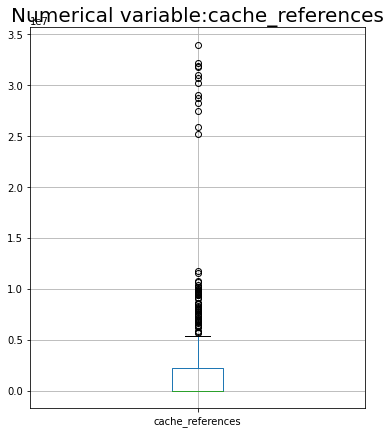

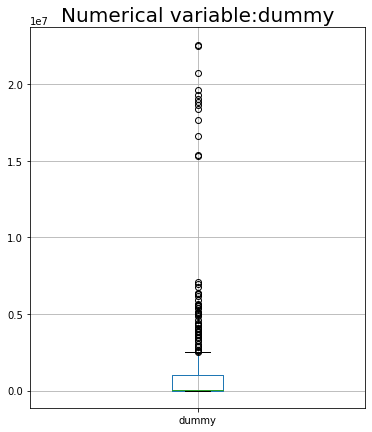

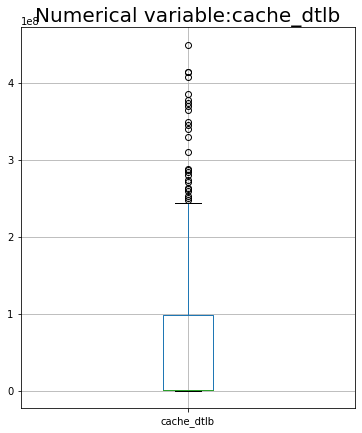

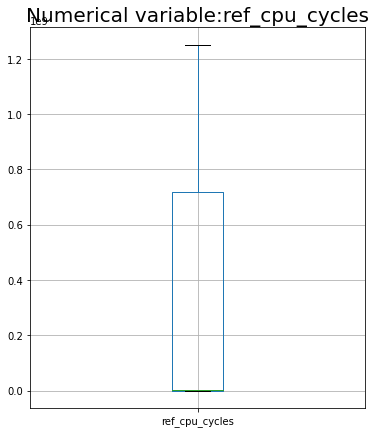

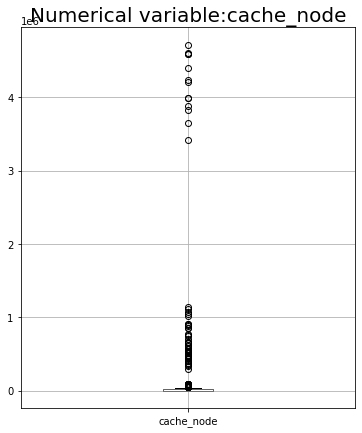

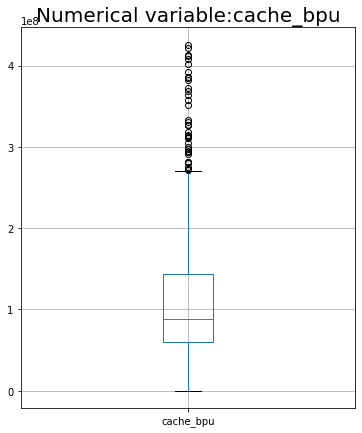

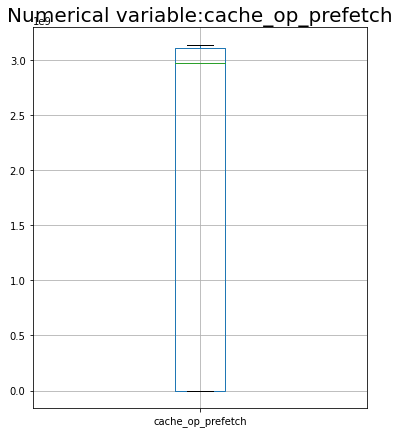

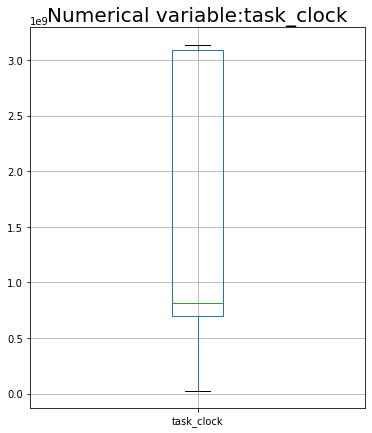

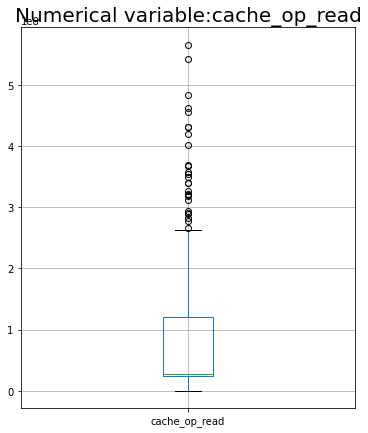

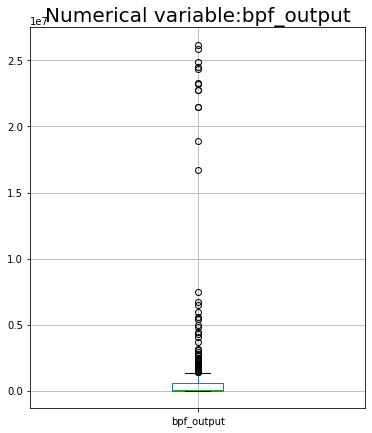

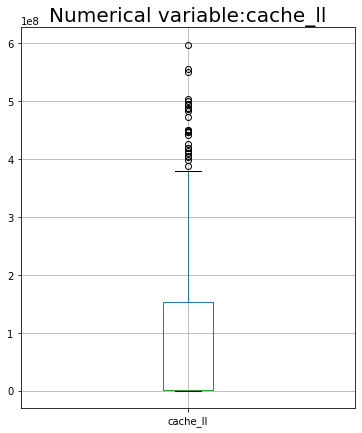

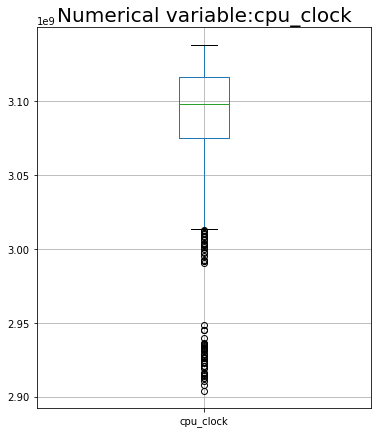

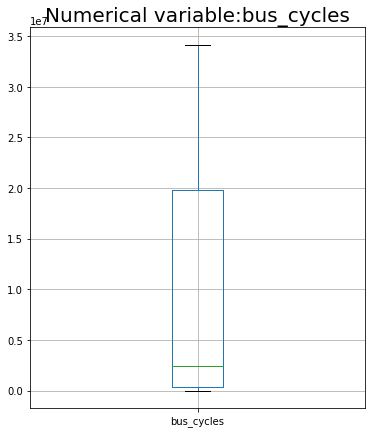

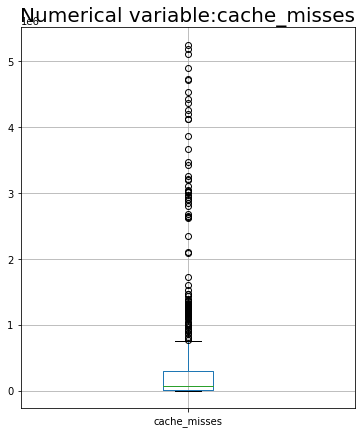

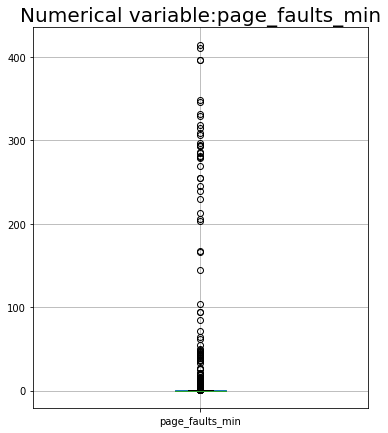

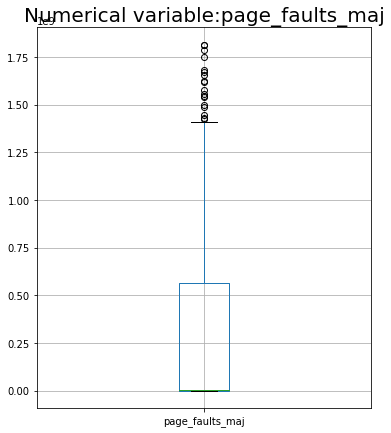

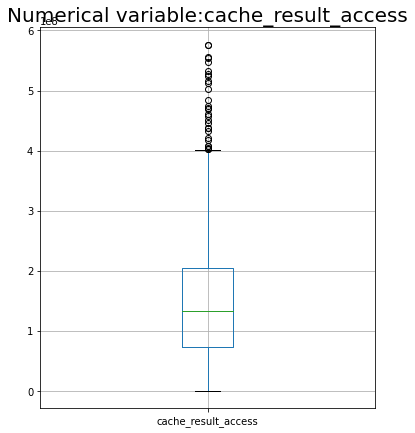

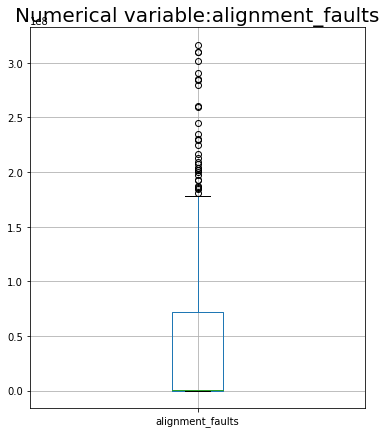

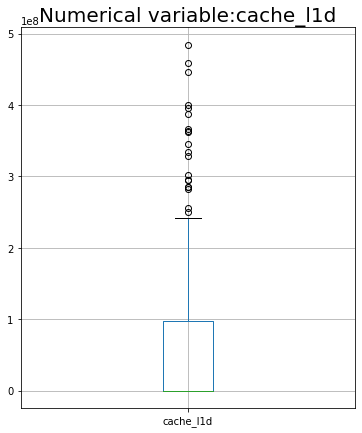

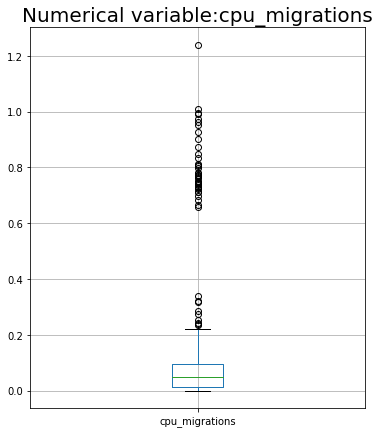

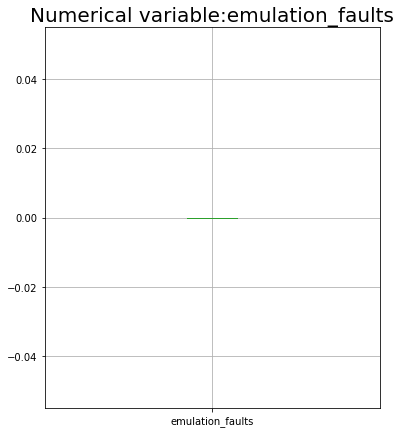

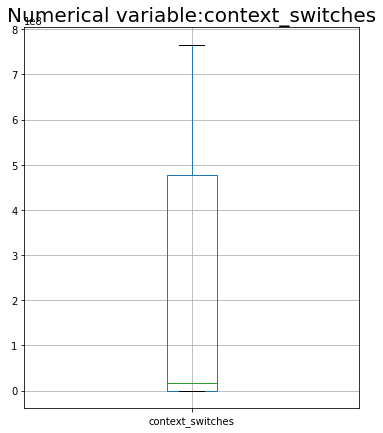

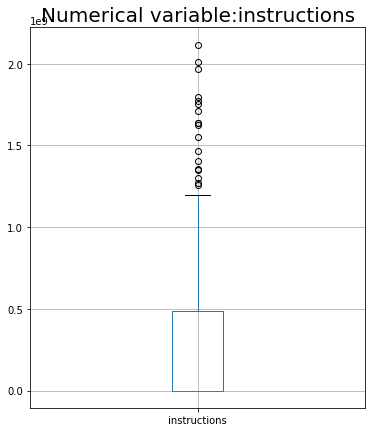

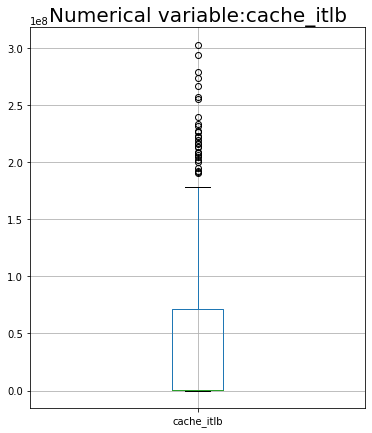

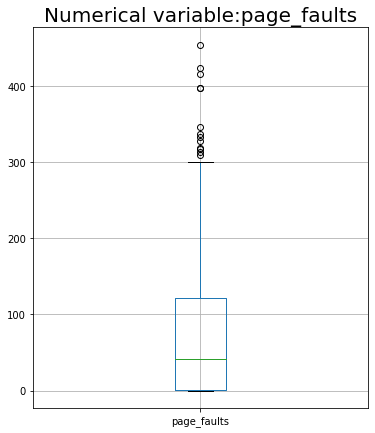

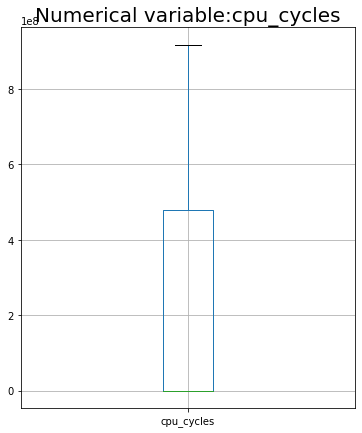

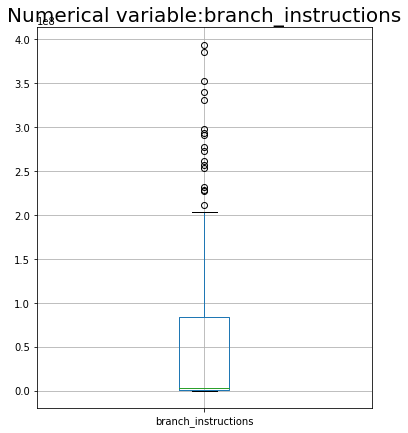

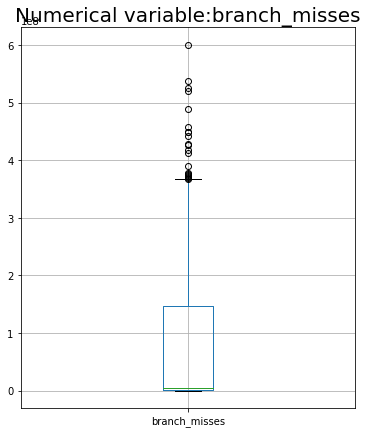

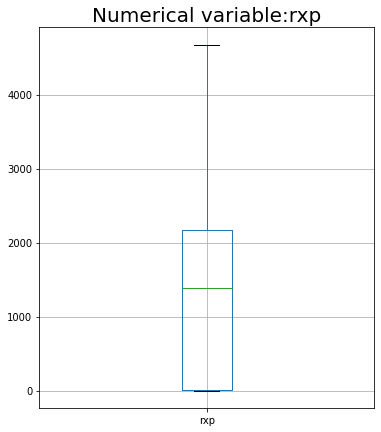

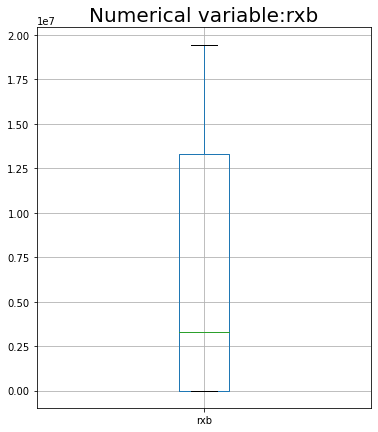

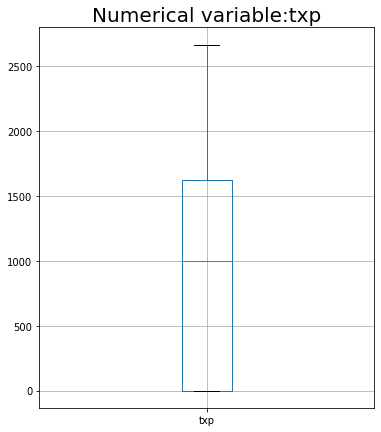

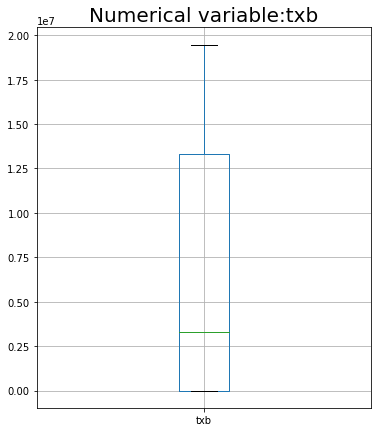

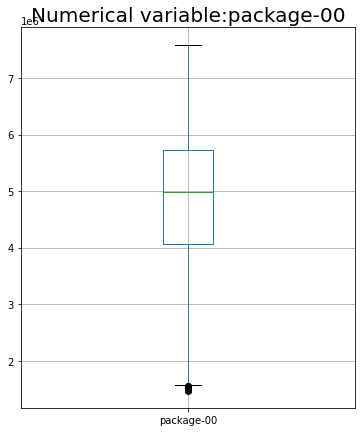

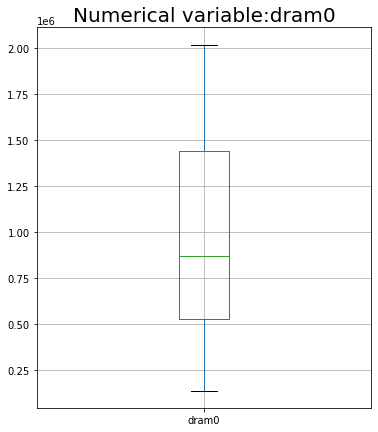

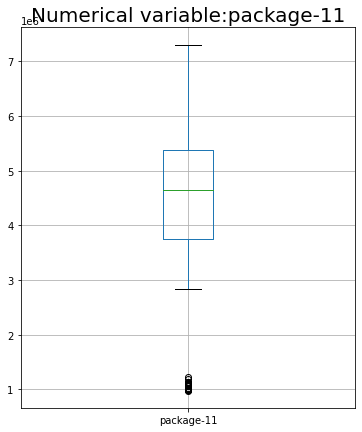

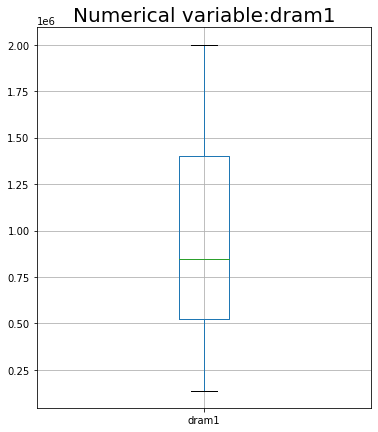

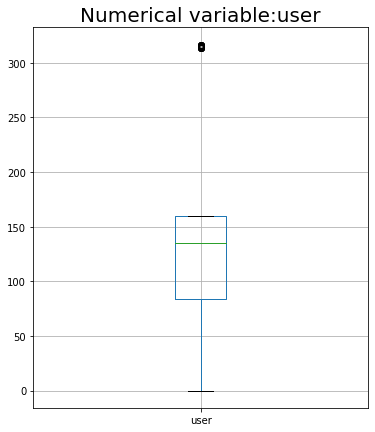

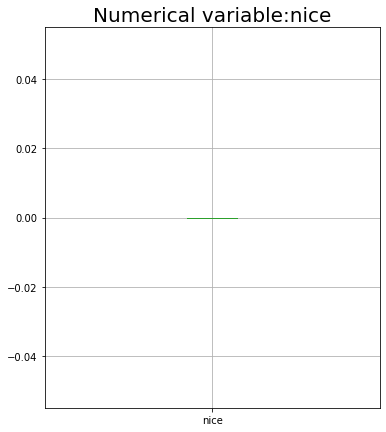

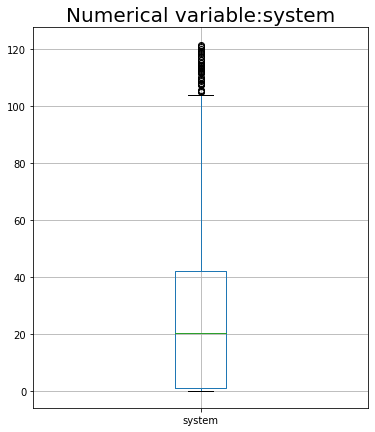

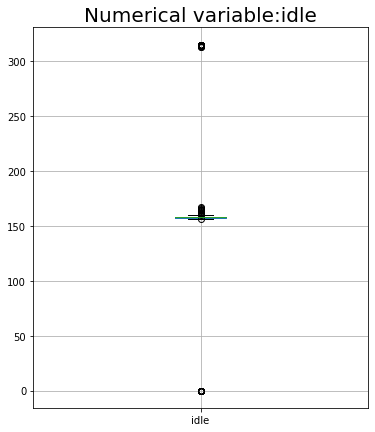

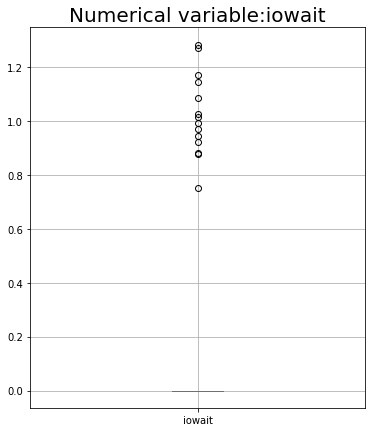

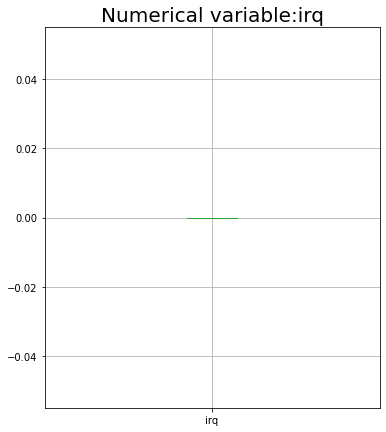

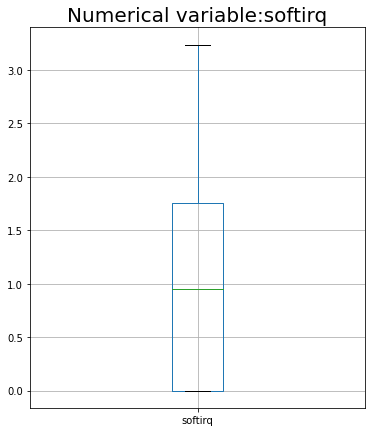

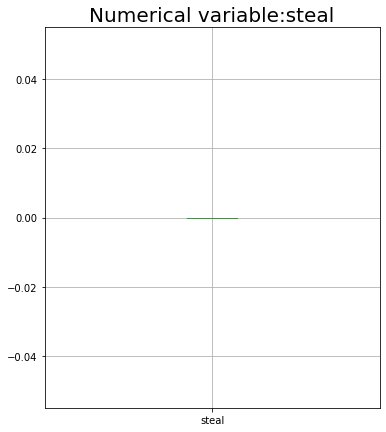

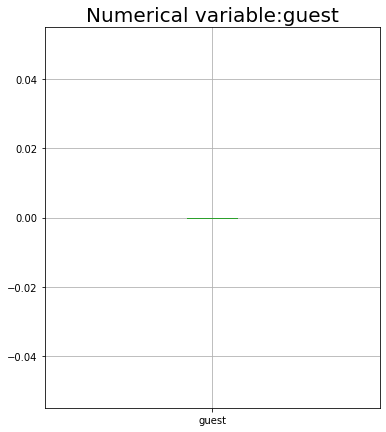

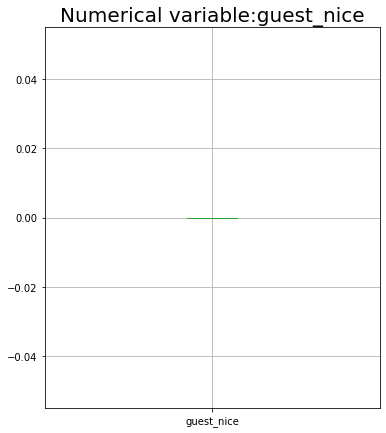

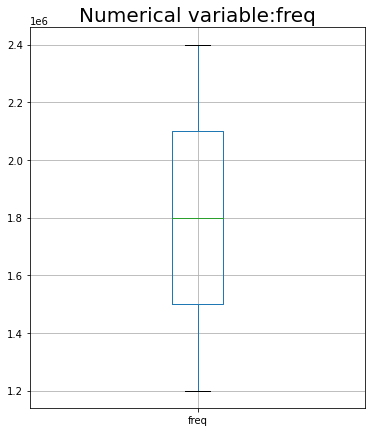

In [36]:
for col in vectors.columns:
    plt.figure(figsize=(6,7))
    vectors[[col]].boxplot()
    plt.title("Numerical variable:"+col, fontsize=20)
    plt.show()

## Distributions of features

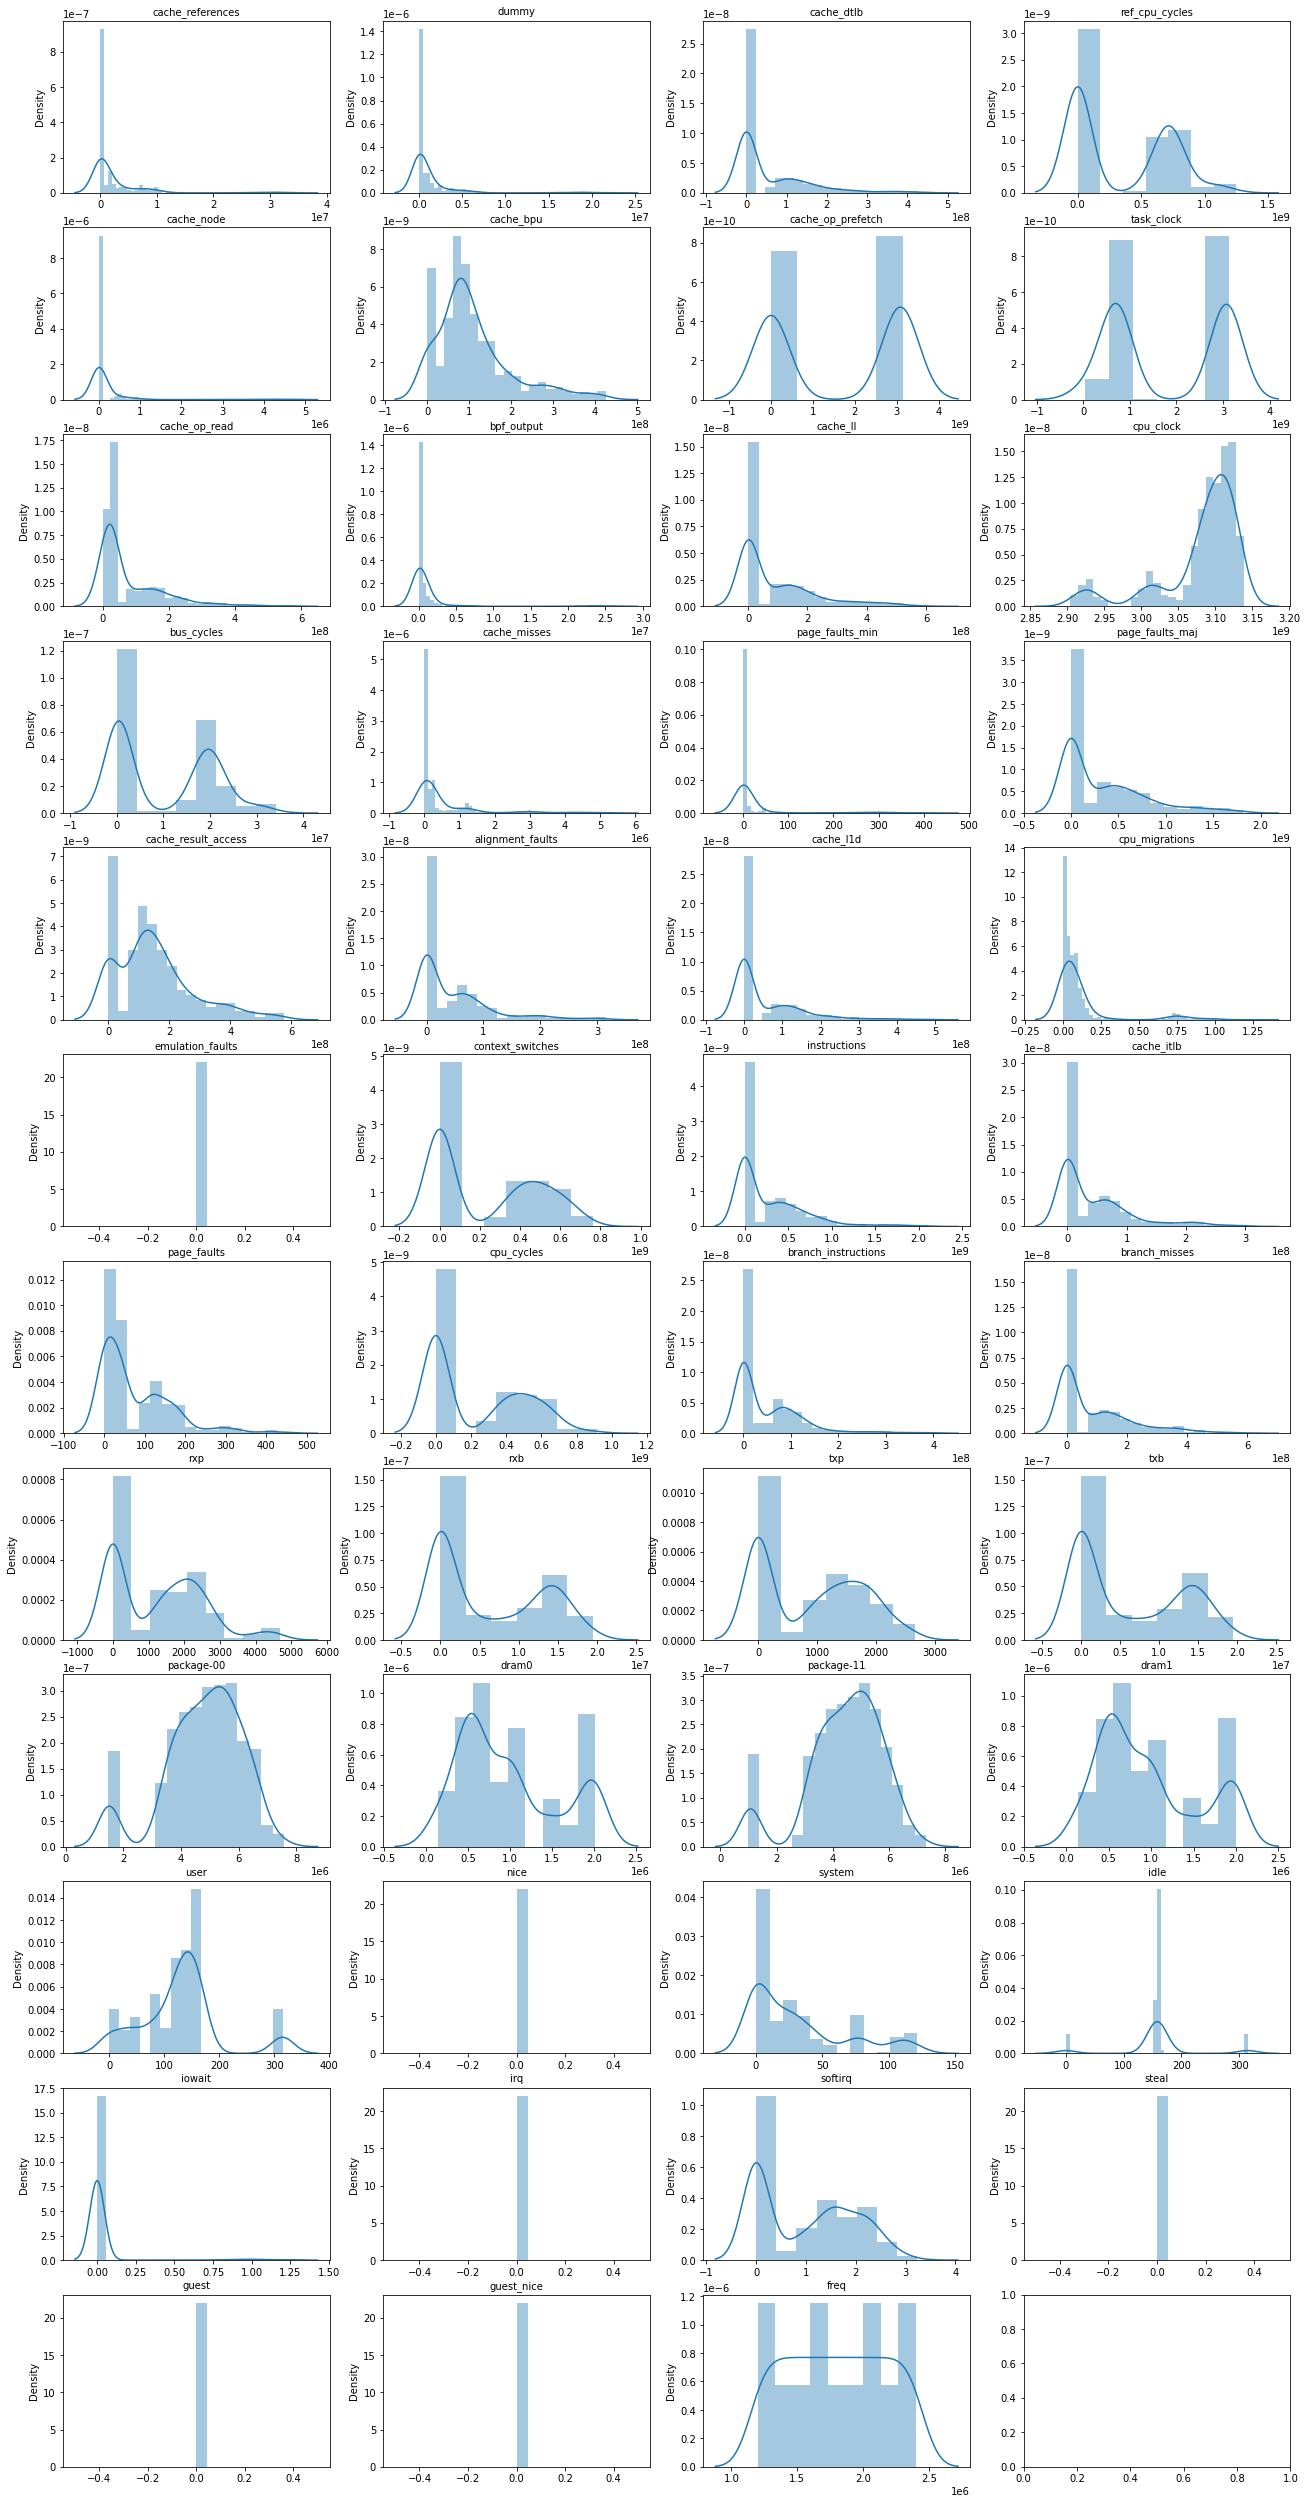

In [42]:
def plot_dist(col, ax):
    sns.distplot(vectors[col],ax=ax)
    ax.set_xlabel('', fontsize=10)
    ax.set_title("{}".format(col), fontsize= 10)
    return ax

f, ax = plt.subplots(12,4, figsize = (22,45))
f.tight_layout(h_pad=47, w_pad=2, rect=[0, 0.03, 1, 0.93])
cols = vectors.columns
k = 0
for i in range(12):
    for j in range(4):
        plot_dist(cols[k], ax[i][j])
        if k >= len(cols)-1:
            break
        k += 1
#__ = plt.suptitle("Initial Distributions of features", fontsize= 25)

## Relation of features to target

We see that for some features like 'cpu_clock, rxb, ...' there is a strong linear correlation **r** to the target. p is p-value

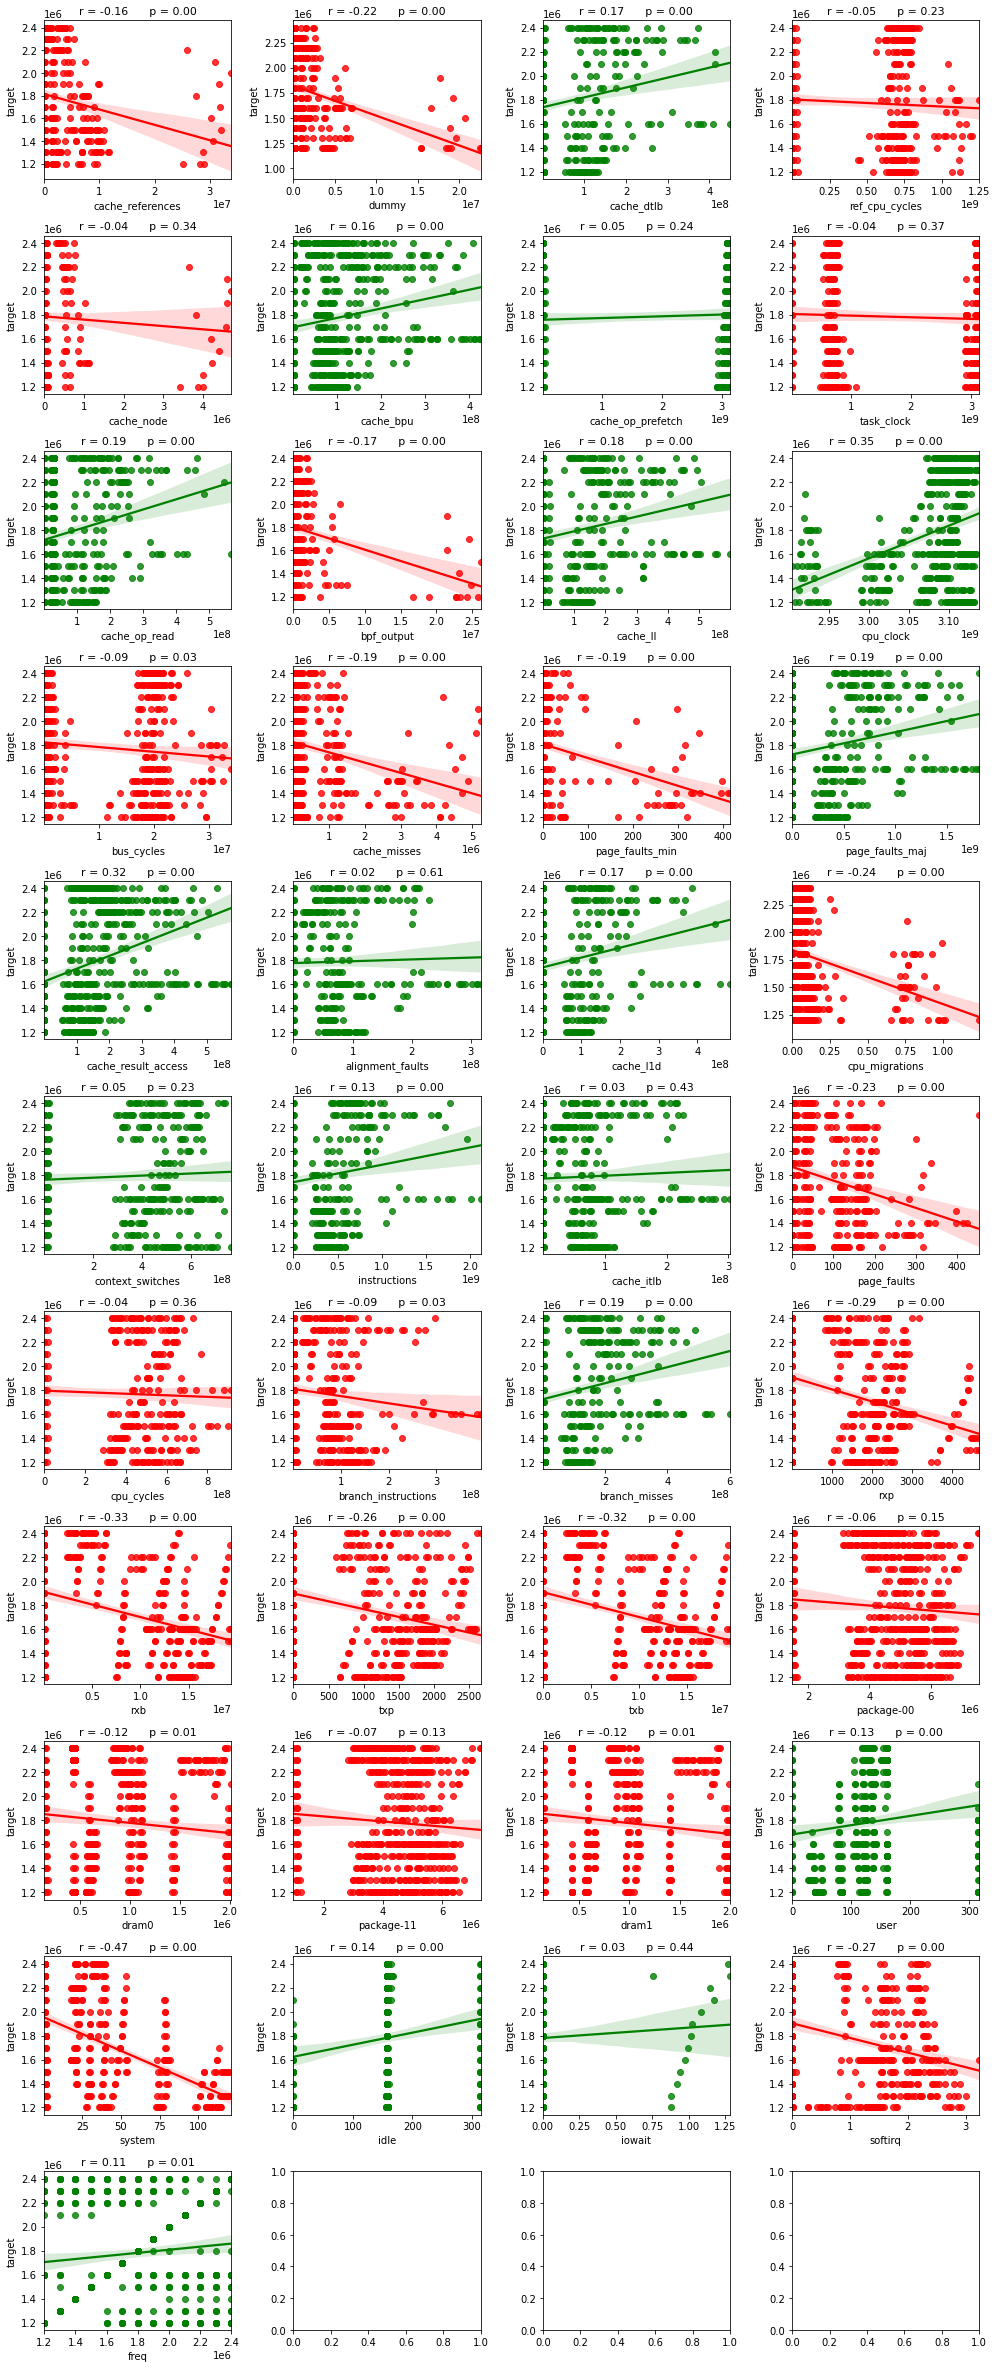

In [57]:
nr_rows = 11
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(vectors.columns)
li_not_plot = ['guest', 'guest_nice', 'irq','steal','nice','emulation_faults']
li_plot_num_feats = [c for c in list(vectors.columns) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            stp = stats.pearsonr(vectors[li_plot_num_feats[i]], knowledge['target'])
            if stp[0] >= 0:
                color = 'g'
            else:
                color = 'r'
            sns.regplot(vectors[li_plot_num_feats[i]], knowledge['target'], ax = axs[r][c], color=color)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show() 

## Correlated Variables
Too highly correlated variables with one another should remove. Bcz these can decrease the model's availablility to learn, decrease model interpretability, and decrease generalization performance on the test set.

**Threshold:0.9** for removing correlated variables.


In [72]:
def plot_corr_matrix(df, nr_c, targ) :
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    plt.show()

In [148]:
vectors_target=vectors.copy()
vectors_target['target'] = knowledge['target']

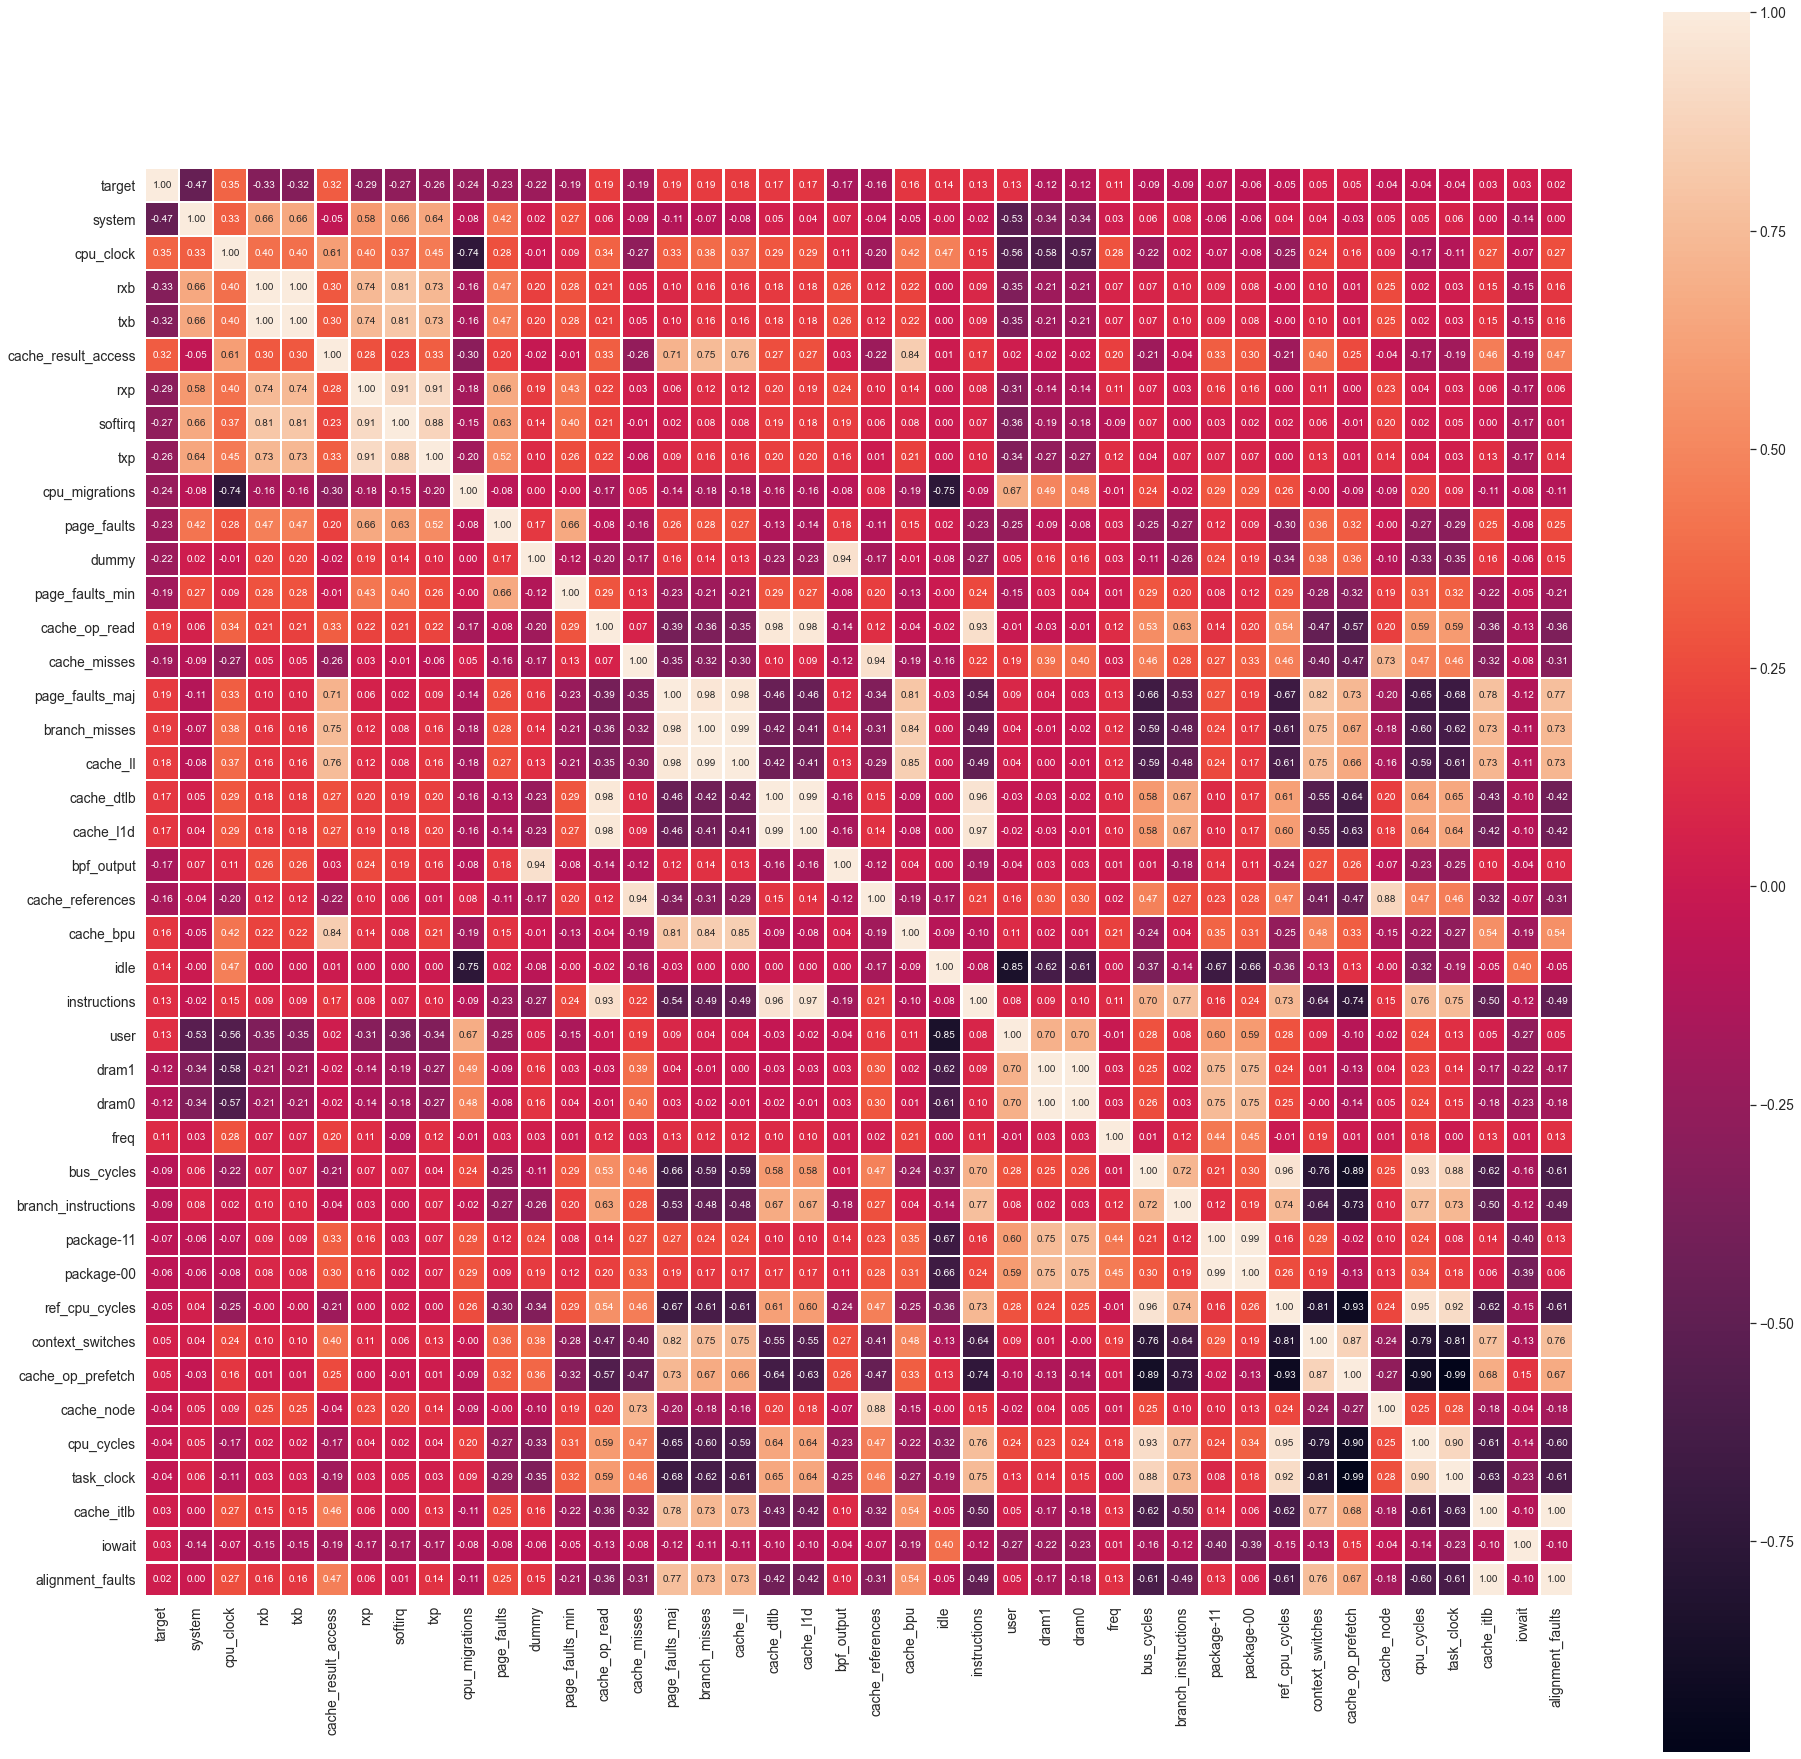

In [73]:
plot_corr_matrix(vectors_target, len(vectors_target.columns), 'target')

## Data pre-processing

Drop all columns with only small correlation to target, standardscaler, ...

In [150]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [151]:
skf = StratifiedKFold(n_splits=5)
vectors_target['Kfold'] = -1
for i, (train_index, test_index) in enumerate(skf.split(vectors, knowledge.target)):
    print("Fold: ",i, "TEST:", test_index)
    vectors_target.loc[list(test_index),'Kfold'] = i

Fold:  0 TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  17  18
  19  20  26  27  28  30  31  32  33  34  35  36  37  38  39  40  41  43
  44  45  46  47  48  52  54  56  57  58  59  60  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  82  83  84  85  86  87  88  91  99 100
 101 102 108 110 111 112 113 115 121 126 127 128 130 131 132 133 134 135
 136 137 140 153 156 157 160 162 163 164 165 192 208 209]
Fold:  1 TEST: [ 16  21  22  23  24  25  29  42  49  50  51  53  55  61  62  63  64  79
  80  81  89  90  92  93  94  95  96  97  98 103 104 105 106 109 117 118
 122 123 124 125 129 138 139 141 142 143 144 145 146 147 148 149 150 151
 152 154 155 161 166 167 168 169 170 173 174 175 176 177 178 179 180 181
 182 189 190 191 195 196 199 200 201 202 203 204 205 206 207 210 211 212
 213 214 215 217 218 238 240 241 251 257 270 286 287 290]
Fold:  2 TEST: [107 114 116 119 120 158 159 171 172 183 184 185 186 187 188 193 194 197
 198 216 219 220 221 222 223 224 225

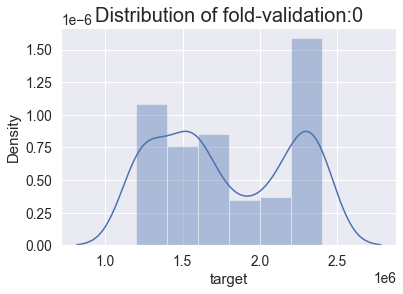

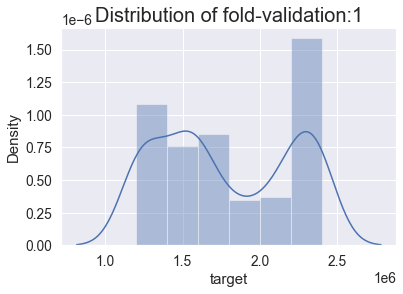

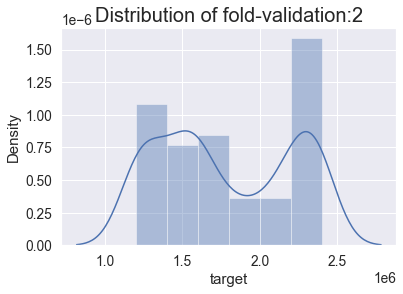

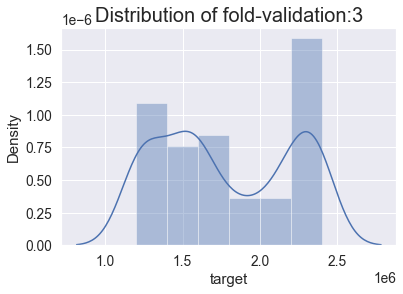

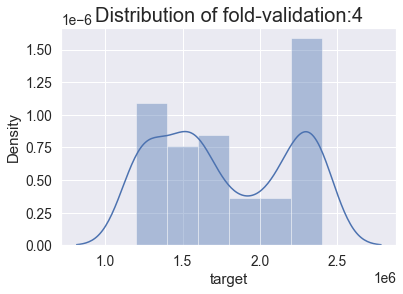

In [152]:
for i in range(5):
    plt.figure()
    sns.distplot(vectors_target[vectors_target.Kfold != i]['target'])
    plt.title("Distribution of fold-validation:"+str(i), fontsize=20)
    plt.show()
    

In [163]:
FOLD = 1
sc = StandardScaler()
df_train = sc.fit_transform(vectors[vectors_target.Kfold != FOLD])
df_test = sc.transform(vectors[vectors_target.Kfold == FOLD])
df_train_sc = pd.DataFrame(df_train,columns = vectors.columns)
df_test_sc = pd.DataFrame(df_train,columns = vectors.columns) 

In [169]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
principalComponents = pca.fit_transform(df_train_sc)
principalDf = pd.DataFrame(data = pca.components_, columns=vectors.columns)

In [170]:
principalDf

cache_references     dummy  cache_dtlb  ref_cpu_cycles  cache_node  \
0           0.158897 -0.077376    0.189039        0.257769    0.091576   
1          -0.000101  0.013292    0.194098        0.027530    0.079749   
2          -0.111790 -0.081434   -0.011556       -0.080135   -0.055403   
3          -0.070959 -0.269742    0.183437        0.052789   -0.049784   
4           0.493617 -0.165409   -0.154096       -0.018440    0.486163   
5           0.008489  0.522296    0.060724       -0.073915    0.035040   
6          -0.101493 -0.101332    0.024700       -0.084002   -0.141550   
7          -0.018363 -0.080302    0.038967       -0.059651    0.018904   
8           0.129159  0.048039    0.279530       -0.191229    0.430654   
9          -0.016807 -0.066892    0.004444        0.040300   -0.056602   
10          0.072944  0.152978   -0.026839        0.132254    0.058203   
11         -0.053101  0.016094    0.063545       -0.093133   -0.248555   

    cache_bpu  cache_op_prefetch  task_clock  cache_op_read  bpf_output  ...  \
0   -0.140379          -0.263261    0.253722       0.165192   -0.062706  ...   
1    0.090787          -0.040027    0.056066       0.207530    0.057881  ...   
2   -0.197759           0.036497   -0.071264      -0.031182   -0.053898  ...   
3    0.294634          -0.067861    0.076863       0.186395   -0.231246  ...   
4    0.042348          -0.026276    0.012991      -0.171824   -0.124744  ...   
5   -0.007529           0.030651   -0.045483       0.061274    0.544166  ...   
6    0.000170           0.036830   -0.067259       0.021959   -0.150622  ...   
7   -0.230416           0.049067   -0.042719       0.053225   -0.165783  ...   
8   -0.189491           0.200097   -0.189503       0.340295   -0.069579  ...   
9    0.124813           0.042324   -0.101327      -0.020089   -0.059485  ...   
10   0.026093          -0.072890    0.055003      -0.037212    0.229093  ...   
11  -0.070679           0.025193   -0.037643       0.063672   -0.137782  ...   

            nice    system      idle    iowait  irq   softirq  steal  guest  \
0  -0.000000e+00 -0.012877 -0.046695 -0.006861 -0.0 -0.025458   -0.0   -0.0   
1   0.000000e+00  0.246772  0.083776 -0.050045  0.0  0.308278    0.0    0.0   
2   0.000000e+00  0.031070  0.307341  0.204361  0.0 -0.049904    0.0    0.0   
3  -0.000000e+00 -0.219372  0.108051 -0.001585 -0.0 -0.213842   -0.0   -0.0   
4  -1.576461e-44 -0.024120  0.199811  0.077763  0.0 -0.016768    0.0    0.0   
5   4.017803e-41 -0.184852  0.222089  0.080912 -0.0 -0.108474   -0.0   -0.0   
6   1.506102e-38 -0.086107  0.237970  0.207951 -0.0  0.041270   -0.0   -0.0   
7  -2.703637e-37  0.178988 -0.041537  0.031472  0.0 -0.136299    0.0    0.0   
8  -2.769759e-37 -0.264765 -0.096067  0.112110  0.0  0.050553    0.0    0.0   
9  -1.655096e-35  0.003772  0.002804  0.711562  0.0  0.069983    0.0    0.0   
10 -5.642373e-36 -0.205990 -0.036581  0.374037  0.0 -0.124045    0.0    0.0   
11 -3.761582e-35 -0.002705  0.142445  0.146961  0.0 -0.030988    0.0    0.0   

    guest_nice      freq  
0         -0.0 -0.031179  
1          0.0  0.047420  
2          0.0 -0.118994  
3         -0.0  0.103935  
4          0.0  0.069137  
5         -0.0  0.188920  
6         -0.0  0.183472  
7          0.0  0.692413  
8          0.0 -0.174509  
9          0.0  0.182736  
10         0.0  0.075410  
11         0.0 -0.239353  

[12 rows x 47 columns]